<h1>Time series forecasting using XGBoost</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [2]:
df = pd.read_csv('train.csv')

# simplifying the data to just 1 store
df = df.copy()[df['store'] == 0]

# if there is just 1 store, we can delete that column
df = df.drop('store', axis = 1)

In [3]:
#converting Date to data type datetime
df['Date'] = pd.to_datetime(df['Date'])

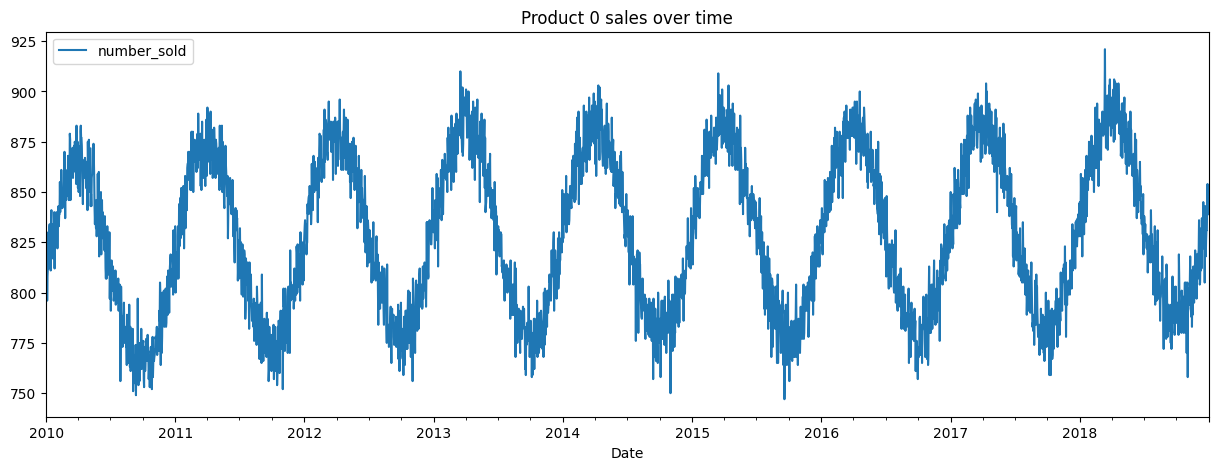

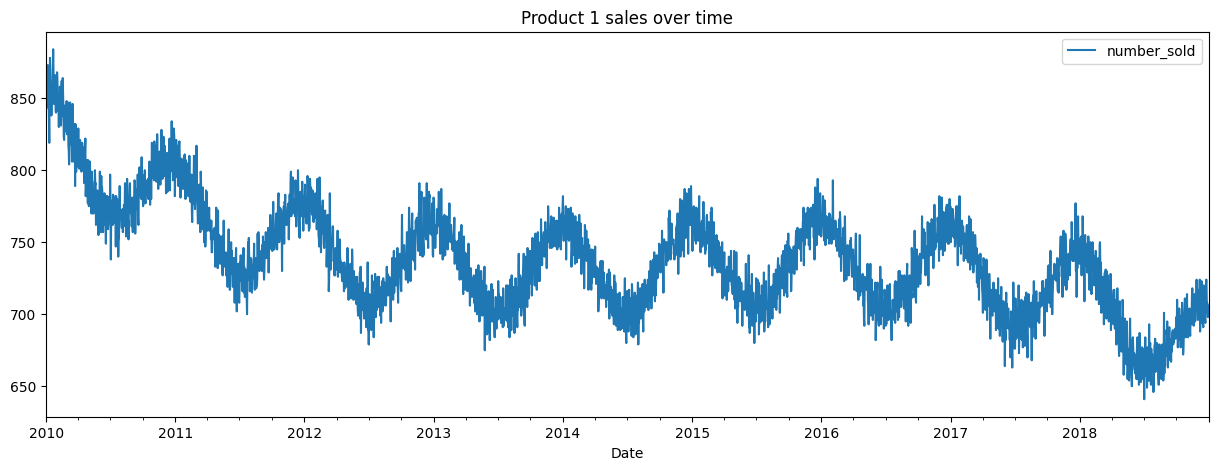

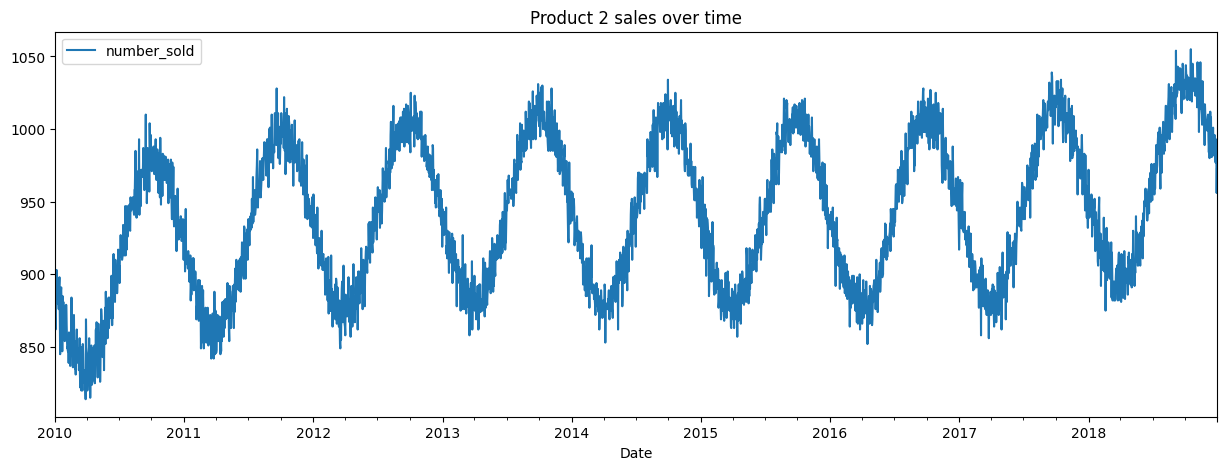

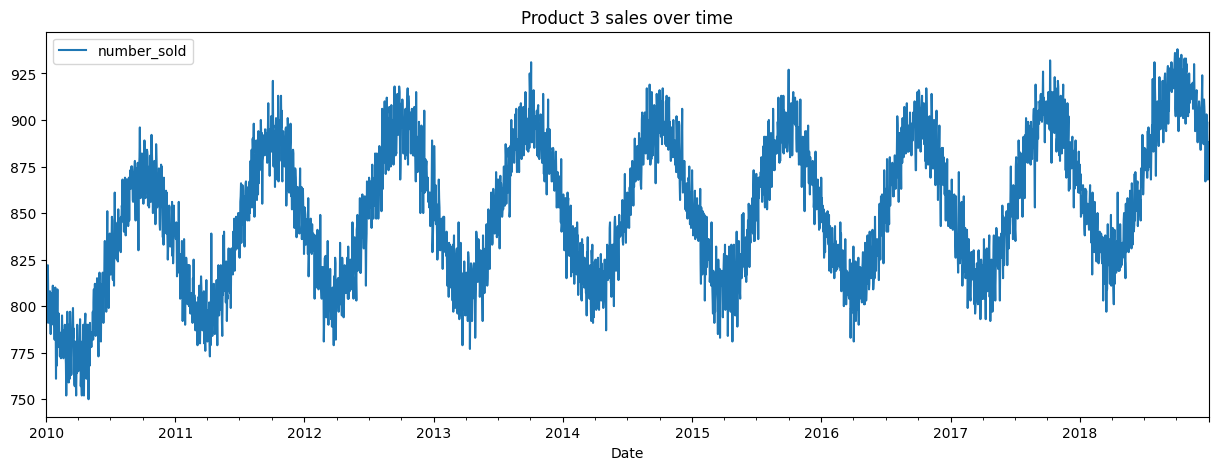

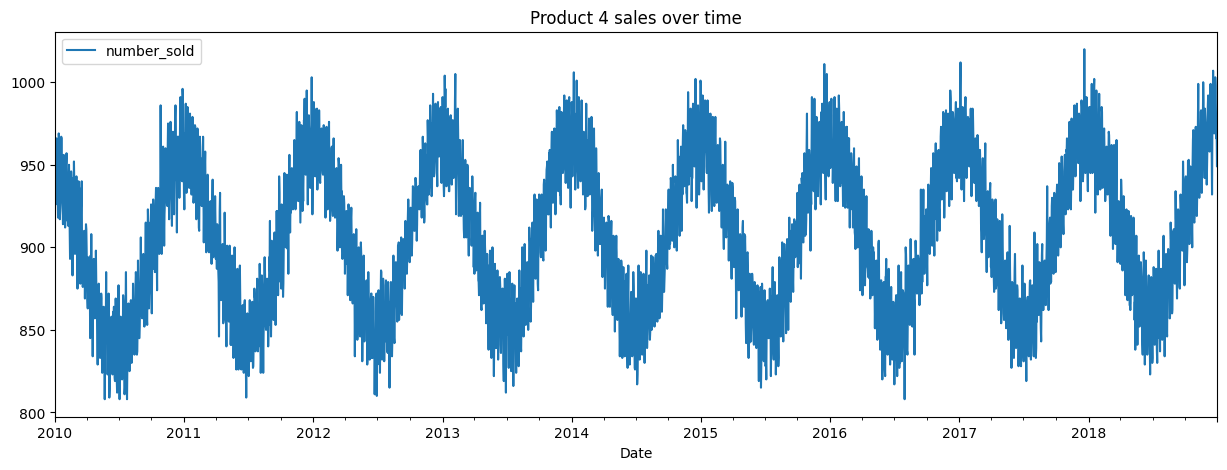

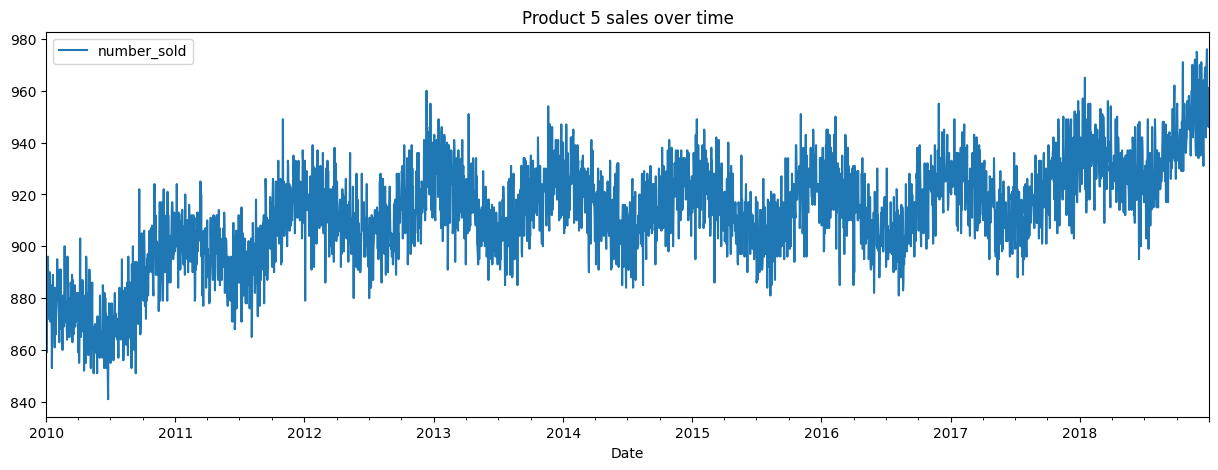

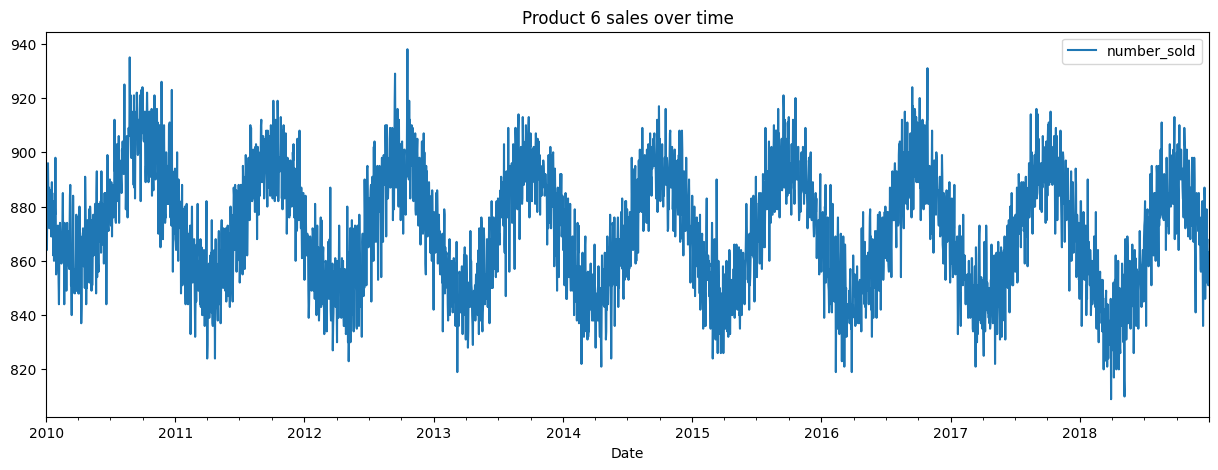

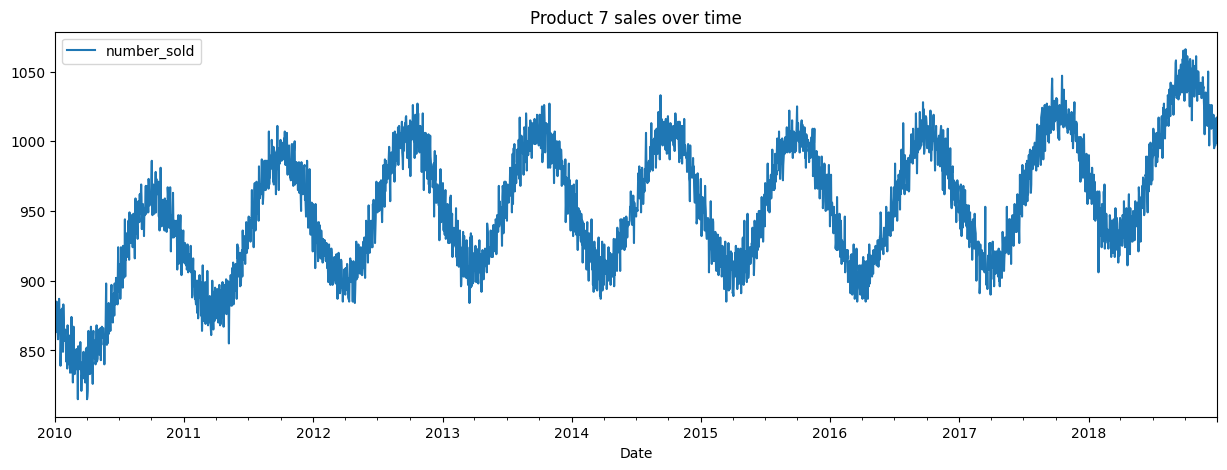

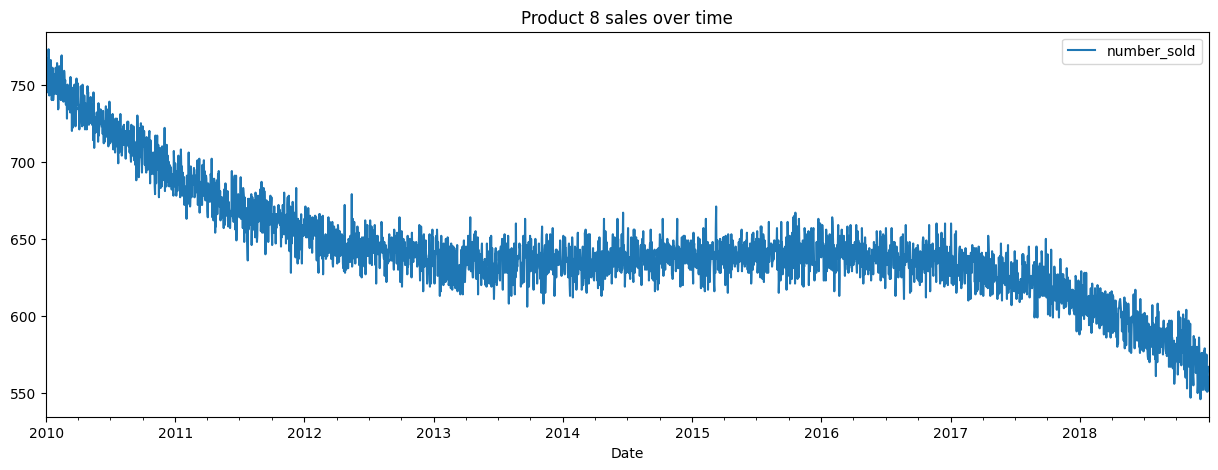

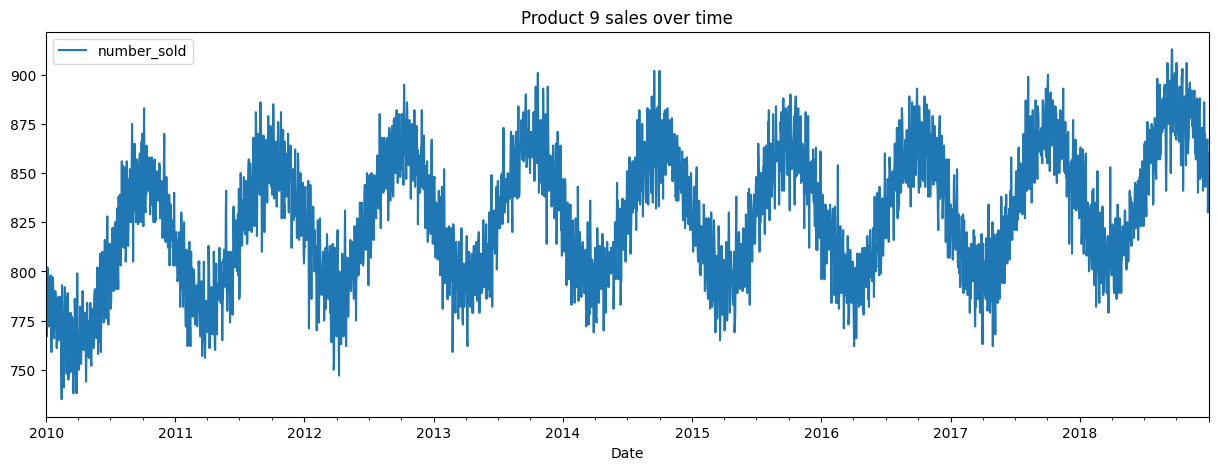

In [4]:
# visualizing the sales of each product over time
for prod in df['product'].unique(): 
    df[df['product'] == prod].plot(x = 'Date', y = 'number_sold', title = f'Product {prod} sales over time', figsize = (15, 5))

Seasonality effects can be seen for all products but Product 8. Long-time trends can be observed too. 

<h1>Feature Engineering</h1>

In [5]:
# creating new columns for weekday hour of day, month and quarter. 
df['hour'] = df['Date'].dt.hour
df['weekday'] = df['Date'].dt.weekday
df['month'] = df['Date'].dt.month
df['quarter'] = df['Date'].dt.quarter

In [6]:
df.describe()

,Date,product,number_sold,hour,weekday,month,quarter
count,32870,32870.000000,32870.000000,32870.0,32870.000000,32870.000000,32870.000000
mean,2014-07-02 00:00:00.000000256,4.500000,847.521387,0.0,3.000913,6.523274,2.508671
min,2010-01-01 00:00:00,0.000000,546.000000,0.0,0.000000,1.000000,1.000000
25%,2012-04-01 00:00:00,2.000000,798.000000,0.0,1.000000,4.000000,2.000000
50%,2014-07-02 00:00:00,4.500000,866.000000,0.0,3.000000,7.000000,3.000000
75%,2016-10-01 00:00:00,7.000000,912.000000,0.0,5.000000,10.000000,4.000000
max,2018-12-31 00:00:00,9.000000,1066.000000,0.0,6.000000,12.000000,4.000000
std,NaN,2.872325,97.930219,0.0,2.000563,3.448661,1.117065


In [7]:
# Unfortunately the hour is always 0 in this data, so we can't use it for forecasting and it can be dropped.
df = df.drop('hour', axis = 1)

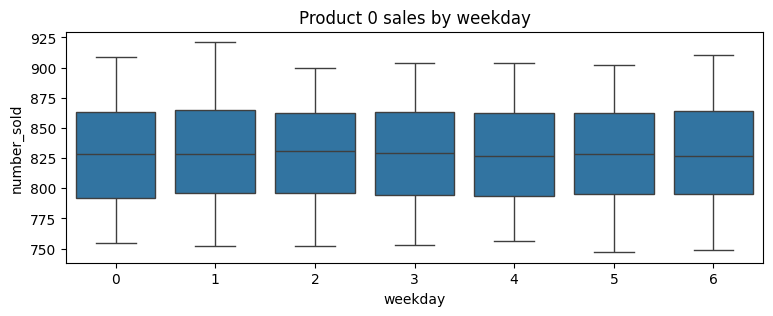

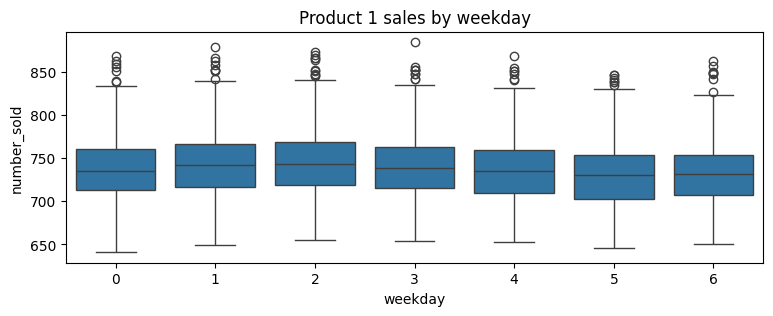

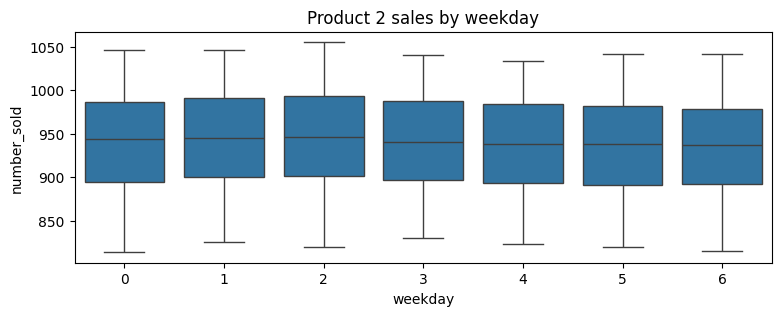

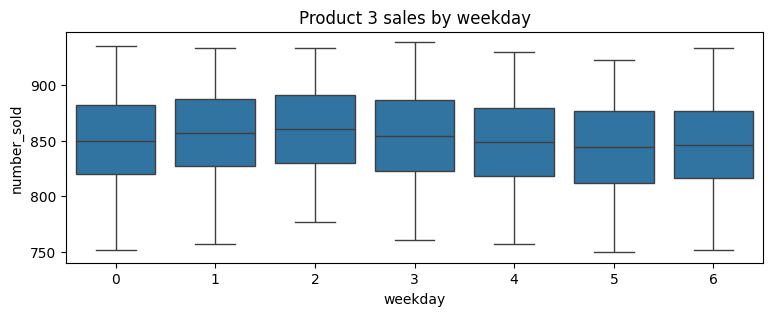

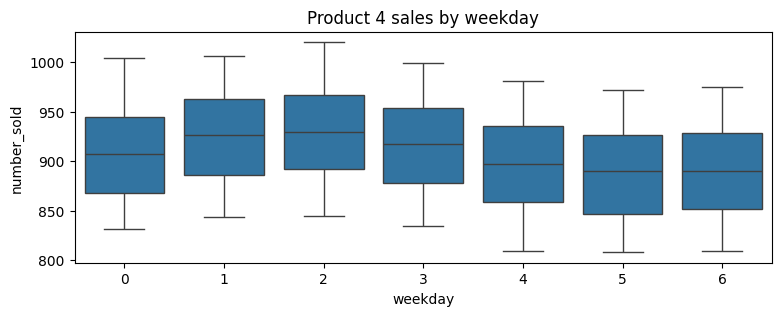

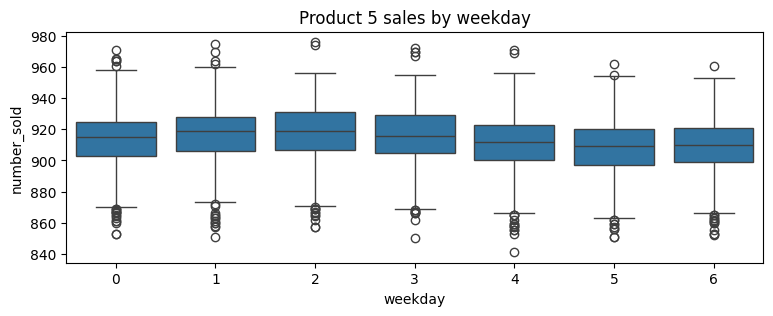

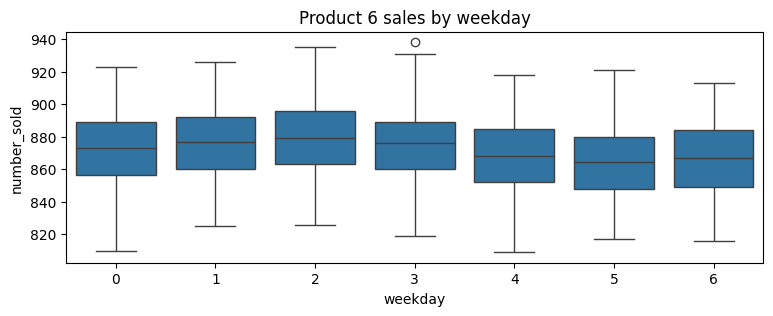

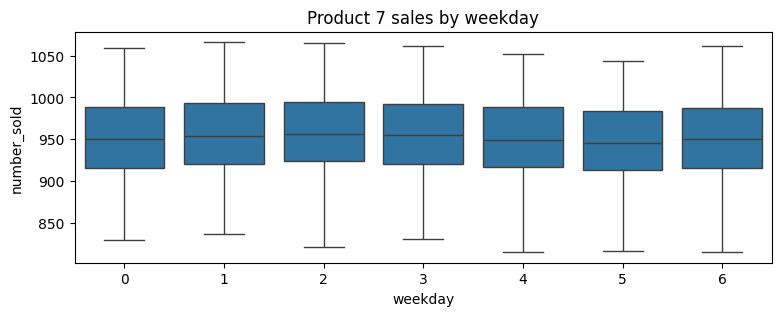

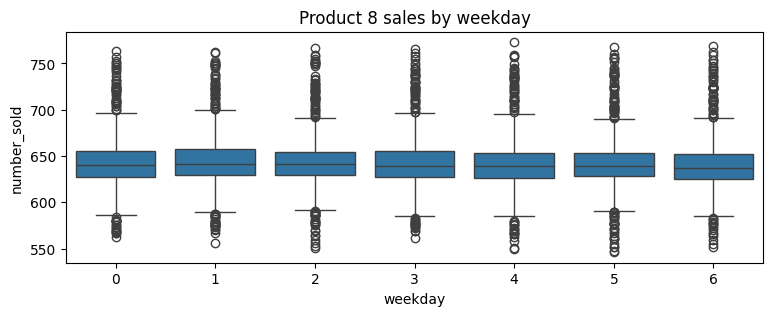

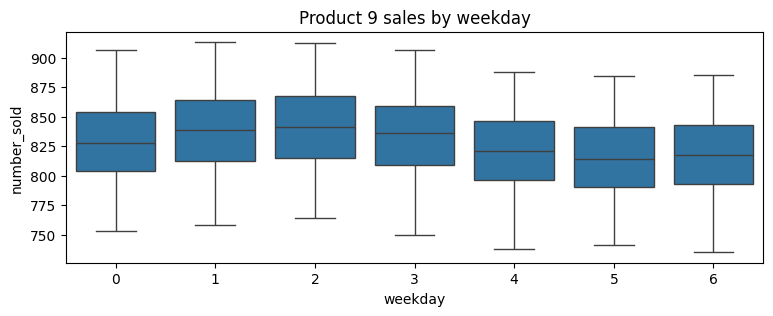

In [15]:
# visualizing impact of new columns
for prod in df['product'].unique():
    fig, ax = plt.subplots(figsize = (9, 3))
    sns.boxplot(data = df[df['product'] == prod], x = 'weekday', y = 'number_sold')
    ax.set_title(f'Product {prod} sales by weekday')
    plt.show()

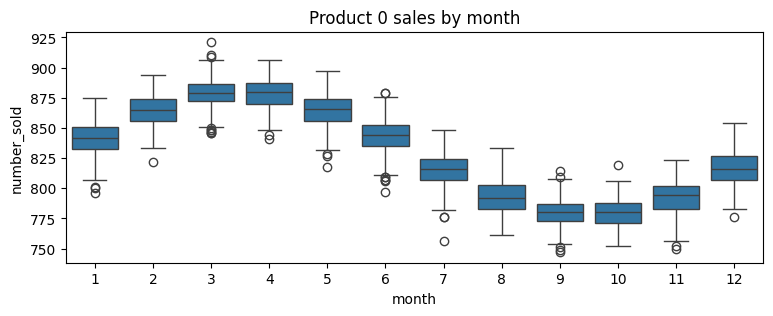

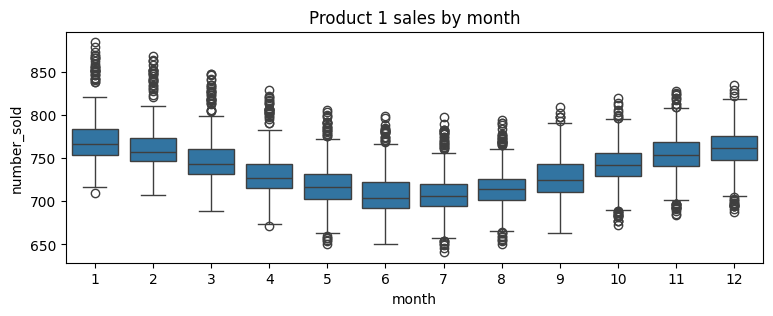

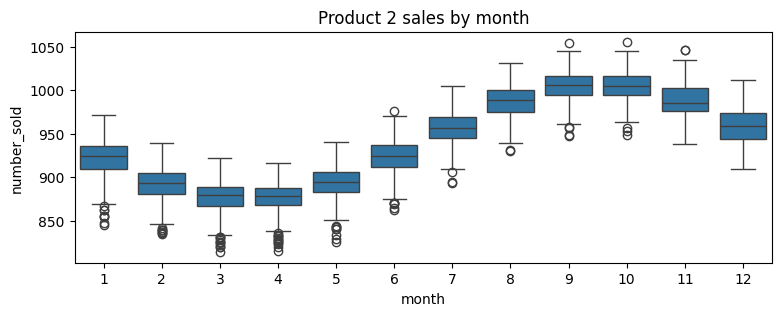

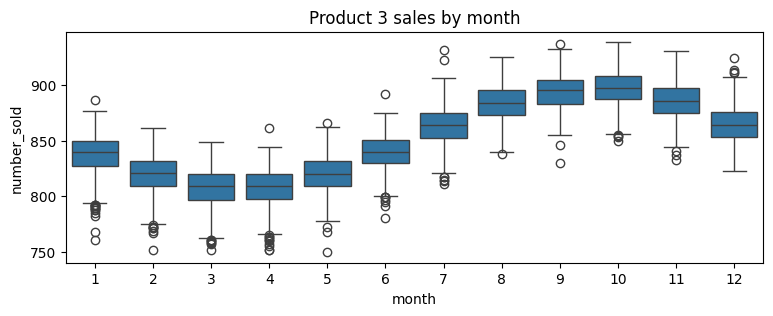

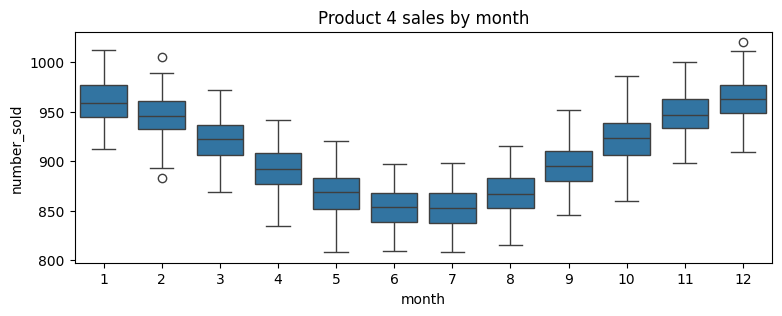

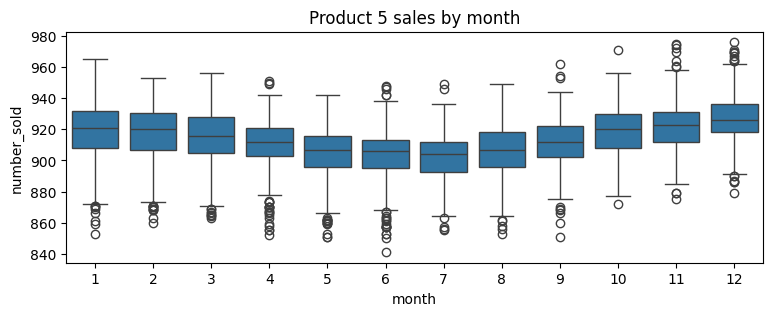

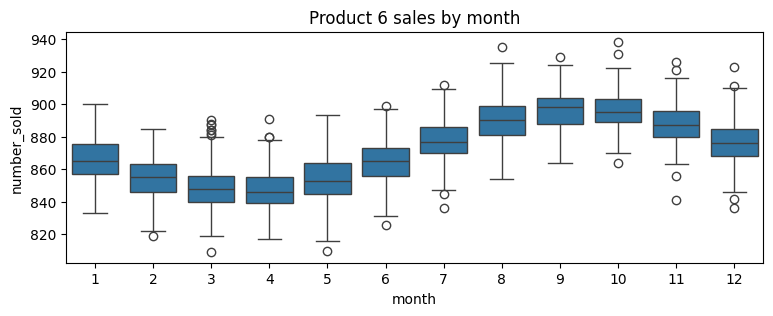

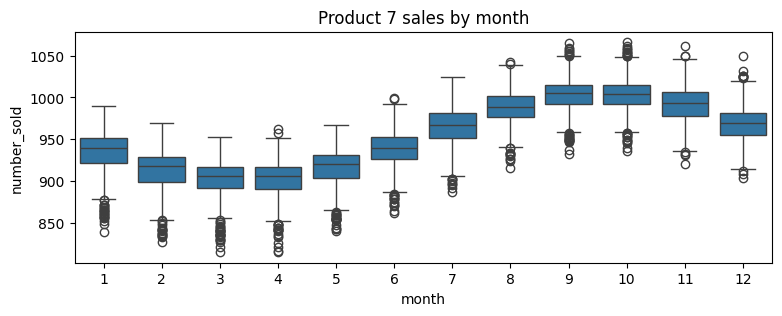

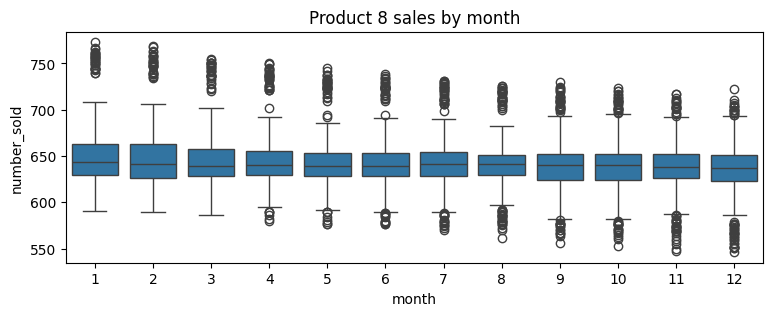

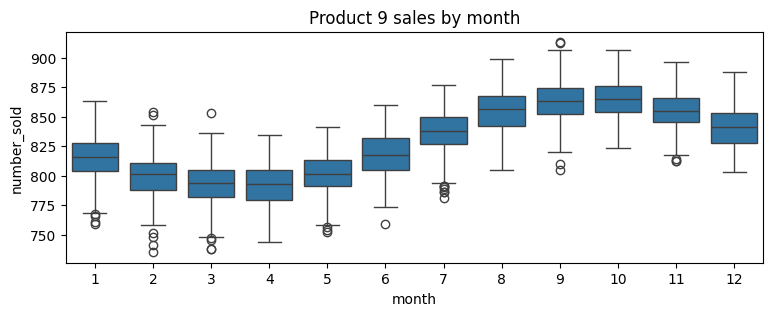

In [16]:
for prod in df['product'].unique():
    fig, ax = plt.subplots(figsize = (9, 3))
    sns.boxplot(data = df[df['product'] == prod], x = 'month', y = 'number_sold')
    ax.set_title(f'Product {prod} sales by month')
    plt.show()